In [4]:
import random
import matplotlib.pyplot as plt
import numpy as np

Generate random hypothesis function $h$

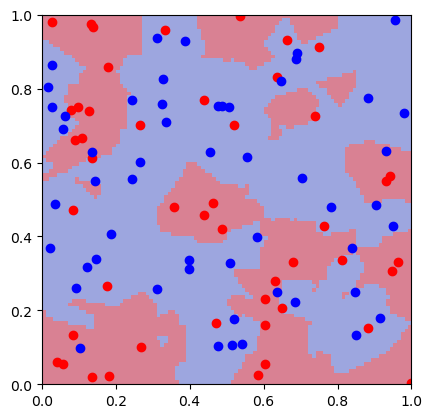

In [ ]:
# sample 100 centres uniformly from [0, 1]^2
centres = [(random.uniform(0, 1), random.uniform(0, 1)) for _ in range(100)]
# give each a random label from {0, 1}
labels = [random.choice([0, 1]) for _ in range(100)]
S = list(zip(centres, labels))

def h(x, y, S, v):
    # find v nearest centres to (x, y) in S and take majority label
    distances_squared_with_labels = [((x - cx) ** 2 + (y - cy) ** 2, label) for (cx, cy), label in S]
    distances_squared_with_labels.sort(key=lambda pair: pair[0])    # note: keep labels attached
    v_nearest_labels = [label for _, label in distances_squared_with_labels[:v]]
    zero_count = 0
    for label in v_nearest_labels:
        if label == 0:
            zero_count += 1
    return 0 if zero_count > v / 2 else 1

# split grid [0, 1]^2 into 100x100 cells
x_vals = np.linspace(0, 1, 100)
y_vals = np.linspace(0, 1, 100)
# classify each cell using h
v = 3
classified_cells = [[h(x, y, S, v) for x in x_vals] for y in y_vals]

# plot the centres with the distribution over hypotheses
plt.imshow(classified_cells, extent=(0, 1, 0, 1), origin='lower', alpha=0.5, cmap='coolwarm')
for (x, y), label in S:
    colour = 'red' if label == 1 else 'blue'
    plt.scatter(x, y, c=colour)
plt.show()

Estimated generalisation error of k-NN as a function of k